In [3]:
import numpy as np

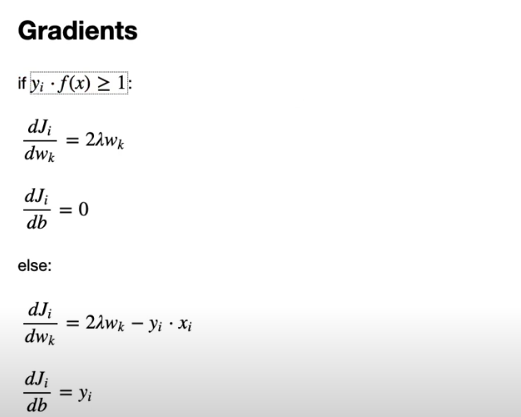

In [4]:
class SVM:
    def __init__(self, learning_rate = 0.001, lambda_param = 0.01, n_iters = 1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        y_ = np.where(y <= 0, -1, 1)
        n_samples, n_features = X.shape

        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = (y_[idx] * (np.dot(x_i, self.w)) - self.b) >=1
                if condition:
                    dw = 2 * self.lambda_param * self.w
                    self.w -= self.lr * dw
                else:
                    dw = 2 * self.lambda_param * self.w - np.dot(y_[idx],x_i)
                    db = y_[idx]
                    self.w -= self.lr *  dw
                    self.b -= self.lr * db
    

    def predict(self, X):
        linear_output = np.dot(X, self.w) - self.b
        return np.sign(linear_output)
    


[0.53483989 0.13987762] -0.1410000000000001


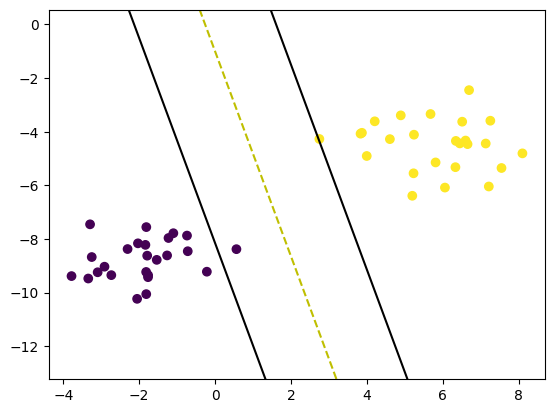

In [ ]:
# Testing
if __name__ == "__main__":
    # Imports
    from sklearn import datasets
    import matplotlib.pyplot as plt

    X, y = datasets.make_blobs(
        n_samples=50, n_features=2, centers=2, cluster_std=1.05, random_state=40
    )
    y = np.where(y == 0, -1, 1)

    clf = SVM()
    clf.fit(X, y)
    # predictions = clf.predict(X)

    print(clf.w, clf.b)

    def visualize_svm():
        def get_hyperplane_value(x, w, b, offset):
            return (-w[0] * x + b + offset) / w[1]

        fig = plt.figure()
        ax = fig.add_subplot(1, 1, 1)
        plt.scatter(X[:, 0], X[:, 1], marker="o", c=y)

        x0_1 = np.amin(X[:, 0])
        x0_2 = np.amax(X[:, 0])

        x1_1 = get_hyperplane_value(x0_1, clf.w, clf.b, 0)
        x1_2 = get_hyperplane_value(x0_2, clf.w, clf.b, 0)

        x1_1_m = get_hyperplane_value(x0_1, clf.w, clf.b, -1)
        x1_2_m = get_hyperplane_value(x0_2, clf.w, clf.b, -1)

        x1_1_p = get_hyperplane_value(x0_1, clf.w, clf.b, 1)
        x1_2_p = get_hyperplane_value(x0_2, clf.w, clf.b, 1)

        ax.plot([x0_1, x0_2], [x1_1, x1_2], "y--")
        ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "k")
        ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "k")

        x1_min = np.amin(X[:, 1])
        x1_max = np.amax(X[:, 1])
        ax.set_ylim([x1_min - 3, x1_max + 3])

        

        plt.show()

    visualize_svm()

In [6]:
print(y)

[ 1  1 -1  1 -1 -1  1 -1  1 -1  1  1 -1  1  1  1  1  1  1  1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1  1  1 -1 -1  1 -1  1 -1  1  1 -1 -1  1  1  1 -1 -1  1
  1 -1]


In [7]:
clf.predict(X[0])

np.float64(1.0)

In [10]:
clf.predict(X[2])

np.float64(-1.0)